In [13]:
from knn import *
from utils import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# prepare data
def prepare_data():
    X, Y = read_data('./data/heart.csv', 'target')
    X, Y = shuffle(X, Y)
    X_train, Y_train, X_val, Y_val = split_data(X, Y, 0.8)
    X, Y = None, None
    print('X train shape:', X_train.shape)
    print('Y train shape:', Y_train.shape)
    print('X val shape:', X_val.shape)
    print('Y val shape:', Y_val.shape)
    return X_train, Y_train, X_val, Y_val

In [15]:
# fit knn and report
def run_multiple_knn(X_train, Y_train, X_val, Y_val, Ks):
    train_accuracies = []
    val_accuracies = []
    for k in Ks:
        knn_model = KNN(k)
        knn_model.fit(X_train, Y_train)
        train_preds = knn_model.predict(X_train)
        val_preds = knn_model.predict(X_val)
        train_accuracy, _, _, _, _ = report_classification(Y_train, train_preds)
        val_accuracy, _, _, _, _ = report_classification(Y_val, val_preds)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
    return train_accuracies, val_accuracies

X train shape: (242, 13)
Y train shape: (242,)
X val shape: (61, 13)
Y val shape: (61,)
Best k = 7


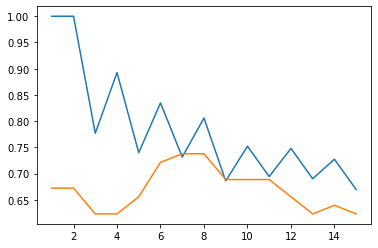

In [22]:
X_train, Y_train, X_val, Y_val = prepare_data()
Ks = [(i+1) for i in range(15)]
train_accuracies, val_accuracies = run_multiple_knn(X_train, Y_train, X_val, Y_val, Ks)
best_k = np.argmax(np.array(val_accuracies)) + 1
print('Best k =', best_k)
plt.plot(Ks, train_accuracies)
plt.plot(Ks, val_accuracies)